In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn 
import matplotlib.pyplot as plt
import statsmodels.api as sm

1. Importation of data





In [4]:
tickers = [
    'AIR.PA', 'ATO.PA', 'CS.PA', 'BNP.PA', 'EN.PA', 'CAP.PA', 'CA.PA', 'ACA.PA', 'BN.PA',
    'DSY.PA', 'ENGI.PA', 'RMS.PA', 'KER.PA', 'OR.PA', 'MC.PA', 'ML.PA', 'ORA.PA', 'RI.PA', 'RNO.PA',
    'SAF.PA', 'SGO.PA', 'SAN.PA', 'SU.PA', 'GLE.PA', 'STLA.PA', 'TEP.PA', 'HO.PA', 'TTE.PA', 'DG.PA', 'VIV.PA'
]
start_date = '2019-01-01'
end_date = '2022-12-31'

stocks_data = [yf.download(tick, start=start_date, end = end_date) for tick in tickers]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [5]:
stocks_data[0]

Price,Close,High,Low,Open,Volume
Ticker,AIR.PA,AIR.PA,AIR.PA,AIR.PA,AIR.PA
Date,,,,,
2019-01-02,79.789650,80.055077,77.827377,79.230358,1483033
2019-01-03,76.983688,79.391503,73.466764,78.993362,1964509
2019-01-04,80.690208,81.069386,77.287035,77.884253,2006859
2019-01-07,79.211388,82.424965,78.339268,81.486489,1428948
2019-01-08,82.140587,83.998584,79.211392,79.467345,2533915
...,...,...,...,...,...
2022-12-23,108.959442,109.466507,108.179354,108.822927,467239
2022-12-27,110.012566,110.851166,109.505509,110.129582,487884


In [6]:
stocks_data[0]['Close']

Ticker,AIR.PA
Date,
2019-01-02,79.789650
2019-01-03,76.983688
2019-01-04,80.690208
2019-01-07,79.211388
2019-01-08,82.140587
...,...
2022-12-23,108.959442
2022-12-27,110.012566
2022-12-28,108.842430


2. Normalisation of data

In [7]:
for i in range(len(stocks_data)):
    stocks_data[i][('Max', tickers[i])] = np.max(stocks_data[i]['Close'])
    stocks_data[i][('Min', tickers[i])] = np.min(stocks_data[i]['Close'])  
    stocks_data[i][('Normalised', tickers[i])] = (stocks_data[i][('Close', tickers[i])] - stocks_data[i][('Min', tickers[i])])/(stocks_data[i][('Max', tickers[i])] - stocks_data[i][('Min', tickers[i])])
    print(stocks_data[i].head())

Price           Close       High        Low       Open   Volume         Max  \
Ticker         AIR.PA     AIR.PA     AIR.PA     AIR.PA   AIR.PA      AIR.PA   
Date                                                                          
2019-01-02  79.789650  80.055077  77.827377  79.230358  1483033  133.625244   
2019-01-03  76.983688  79.391503  73.466764  78.993362  1964509  133.625244   
2019-01-04  80.690208  81.069386  77.287035  77.884253  2006859  133.625244   
2019-01-07  79.211388  82.424965  78.339268  81.486489  1428948  133.625244   
2019-01-08  82.140587  83.998584  79.211392  79.467345  2533915  133.625244   

Price             Min Normalised  
Ticker         AIR.PA     AIR.PA  
Date                              
2019-01-02  47.167782   0.377317  
2019-01-03  47.167782   0.344862  
2019-01-04  47.167782   0.387733  
2019-01-07  47.167782   0.370629  
2019-01-08  47.167782   0.404509  
Price           Close       High        Low       Open  Volume        Max  \
Ticker    

In [8]:
df = [stocks_data[i][['Close','Min','Max','Normalised']] for i in range(len(stocks_data))]

In [9]:
df[2].head

<bound method NDFrame.head of Price           Close       Min        Max Normalised
Ticker          CS.PA     CS.PA      CS.PA      CS.PA
Date                                                 
2019-01-02  13.350404  9.399975  24.345886   0.264315
2019-01-03  13.239658  9.399975  24.345886   0.256905
2019-01-04  13.655661  9.399975  24.345886   0.284739
2019-01-07  13.594609  9.399975  24.345886   0.280654
2019-01-08  13.645723  9.399975  24.345886   0.284074
...               ...       ...        ...        ...
2022-12-23  23.432695  9.399975  24.345886   0.938900
2022-12-27  23.499187  9.399975  24.345886   0.943349
2022-12-28  23.361767  9.399975  24.345886   0.934155
2022-12-29  23.406096  9.399975  24.345886   0.937121
2022-12-30  23.100222  9.399975  24.345886   0.916655

[1028 rows x 4 columns]>

3. Computation of distances to choose pairs

In [10]:
euclid_dist = np.empty((len(tickers),len(tickers)))
for i in range(len(df)):
    euclid_dist[i,i] = 0
    for j in range(i+1,len(df)):
        euclid_dist[i,j] = np.linalg.norm(df[i][('Normalised', tickers[i])]-df[j][('Normalised', tickers[j])])
        euclid_dist[j,i] = euclid_dist[i,j]

In [11]:
euclid_dist2 = []
for i in range(len(stocks_data)):
    for j in range(i+1,len(stocks_data)):
        euclid_dist2.append((tickers[i], tickers[j],stocks_data[i][('Close', tickers[i])],stocks_data[j][('Close', tickers[j])], stocks_data[i][('Normalised', tickers[i])], stocks_data[j][('Normalised', tickers[j])], np.linalg.norm(df[i][('Normalised', tickers[i])]-df[j][('Normalised', tickers[j])])))

euclid_dist2_df = pd.DataFrame(euclid_dist2, columns = ['Ticker1','Ticker2','Series1', 'Series2', 'Series1_norm', 'Series2_norm', 'Euclidean Distance'])

In [12]:
euclid_dist2_df

,Ticker1,Ticker2,Series1,Series2,Series1_norm,Series2_norm,Euclidean Distance
0,AIR.PA,ATO.PA,Date 2019-01-02 79.789650 2019-01-03 7...,Date 2019-01-02 54.581379 2019-01-03 51....,Date 2019-01-02 0.377317 2019-01-03 0.34...,Date 2019-01-02 0.641190 2019-01-03 0.60...,12.764353
1,AIR.PA,CS.PA,Date 2019-01-02 79.789650 2019-01-03 7...,Date 2019-01-02 13.350404 2019-01-03 13....,Date 2019-01-02 0.377317 2019-01-03 0.34...,Date 2019-01-02 0.264315 2019-01-03 0.25...,6.251241
2,AIR.PA,BNP.PA,Date 2019-01-02 79.789650 2019-01-03 7...,Date 2019-01-02 25.237352 2019-01-03 25....,Date 2019-01-02 0.377317 2019-01-03 0.34...,Date 2019-01-02 0.216865 2019-01-03 0.21...,8.107989
3,AIR.PA,EN.PA,Date 2019-01-02 79.789650 2019-01-03 7...,Date 2019-01-02 22.165577 2019-01-03 21....,Date 2019-01-02 0.377317 2019-01-03 0.34...,Date 2019-01-02 0.321870 2019-01-03 0.30...,6.171224
4,AIR.PA,CAP.PA,Date 2019-01-02 79.789650 2019-01-03 7...,Date 2019-01-02 76.586601 2019-01-03 7...,Date 2019-01-02 0.377317 2019-01-03 0.34...,Date 2019-01-02 0.153036 2019-01-03 0.12...,9.702262
...,...,...,...,...,...,...,...
430,HO.PA,DG.PA,Date 2019-01-02 90.355408 2019-01-03 8...,Date 2019-01-02 58.325726 2019-01-03 58....,Date 2019-01-02 0.552819 2019-01-03 0.52...,Date 2019-01-02 0.235800 2019-01-03 0.23...,8.976275
431,HO.PA,VIV.PA,Date 2019-01-02 90.355408 2019-01-03 8...,Date 2019-01-02 6.657198 2019-01-03 6.59...,Date 2019-01-02 0.552819 2019-01-03 0.52...,Date 2019-01-02 0.131352 2019-01-03 0.12...,9.924973
432,TTE.PA,DG.PA,Date 2019-01-02 32.560200 2019-01-03 32....,Date 2019-01-02 58.325726 2019-01-03 58....,Date 2019-01-02 0.435281 2019-01-03 0.42...,Date 2019-01-02 0.235800 2019-01-03 0.23...,7.399083
433,TTE.PA,VIV.PA,Date 2019-01-02 32.560200 2019-01-03 32....,Date 2019-01-02 6.657198 2019-01-03 6.59...,Date 2019-01-02 0.435281 2019-01-03 0.42...,Date 2019-01-02 0.131352 2019-01-03 0.12...,7.857510


4. Computation of basic spreads for each pairs

In [13]:
Spread = []
for i in range(len(df)):
    for j in range(i+1,len(df)):
        Spread.append(df[i][('Normalised', tickers[i])]-df[j][('Normalised', tickers[j])])

euclid_dist2_df['Basic Spread'] = Spread

<Axes: >

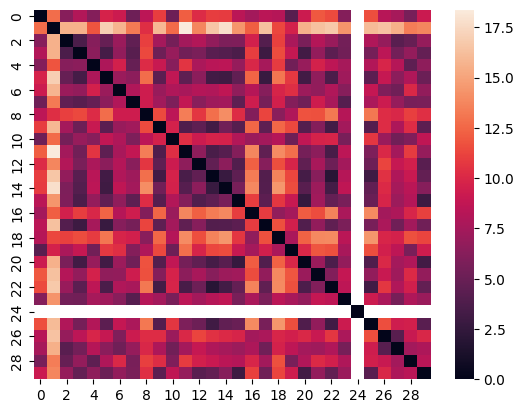

In [14]:
seaborn.heatmap(euclid_dist)

5. We keep the 5 best pairs to construct the portfolio, based on the euclidean distance

In [15]:
sorted_dist = euclid_dist2_df.sort_values(by='Euclidean Distance', ascending=True)

In [16]:
sorted_dist

,Ticker1,Ticker2,Series1,Series2,Series1_norm,Series2_norm,Euclidean Distance,Basic Spread
307,OR.PA,SU.PA,Date 2019-01-02 180.898026 2019-01-03 17...,Date 2019-01-02 51.453636 2019-01-03 5...,Date 2019-01-02 0.017121 2019-01-03 0.00...,Date 2019-01-02 0.012097 2019-01-03 0.00...,2.005759,Date 2019-01-02 0.005024 2019-01-03 0.00...
334,ML.PA,SGO.PA,Date 2019-01-02 17.613869 2019-01-03 17....,Date 2019-01-02 24.626869 2019-01-03 24....,Date 2019-01-02 0.128958 2019-01-03 0.11...,Date 2019-01-02 0.191900 2019-01-03 0.18...,2.623517,Date 2019-01-02 -0.062941 2019-01-03 -0.07...
146,CAP.PA,RI.PA,Date 2019-01-02 76.586601 2019-01-03 7...,Date 2019-01-02 122.473122 2019-01-03 12...,Date 2019-01-02 0.153036 2019-01-03 0.12...,Date 2019-01-02 0.172612 2019-01-03 0.15...,2.761645,Date 2019-01-02 -0.019576 2019-01-03 -0.02...
299,OR.PA,MC.PA,Date 2019-01-02 180.898026 2019-01-03 17...,Date 2019-01-02 231.247971 2019-01-03 22...,Date 2019-01-02 0.017121 2019-01-03 0.00...,Date 2019-01-02 0.017739 2019-01-03 0.00...,2.790912,Date 2019-01-02 -0.000618 2019-01-03 0.00...
97,BNP.PA,RI.PA,Date 2019-01-02 25.237352 2019-01-03 25....,Date 2019-01-02 122.473122 2019-01-03 12...,Date 2019-01-02 0.216865 2019-01-03 0.21...,Date 2019-01-02 0.172612 2019-01-03 0.15...,2.996633,Date 2019-01-02 0.044253 2019-01-03 0.06...
...,...,...,...,...,...,...,...,...
420,STLA.PA,TEP.PA,"Series([], Name: (Close, STLA.PA), dtype: floa...",Date 2019-01-02 122.242203 2019-01-03 11...,"Series([], Name: (Normalised, STLA.PA), dtype:...",Date 2019-01-02 0.016834 2019-01-03 0.00...,NaN,Date 2019-01-02 NaN 2019-01-03 NaN 2019-01...
421,STLA.PA,HO.PA,"Series([], Name: (Close, STLA.PA), dtype: floa...",Date 2019-01-02 90.355408 2019-01-03 8...,"Series([], Name: (Normalised, STLA.PA), dtype:...",Date 2019-01-02 0.552819 2019-01-03 0.52...,NaN,Date 2019-01-02 NaN 2019-01-03 NaN 2019-01...
422,STLA.PA,TTE.PA,"Series([], Name: (Close, STLA.PA), dtype: floa...",Date 2019-01-02 32.560200 2019-01-03 32....,"Series([], Name: (Normalised, STLA.PA), dtype:...",Date 2019-01-02 0.435281 2019-01-03 0.42...,NaN,Date 2019-01-02 NaN 2019-01-03 NaN 2019-01...
423,STLA.PA,DG.PA,"Series([], Name: (Close, STLA.PA), dtype: floa...",Date 2019-01-02 58.325726 2019-01-03 58....,"Series([], Name: (Normalised, STLA.PA), dtype:...",Date 2019-01-02 0.235800 2019-01-03 0.23...,NaN,Date 2019-01-02 NaN 2019-01-03 NaN 2019-01...


In [17]:
Pairs = sorted_dist[:5]

In [18]:
Pairs = Pairs.reset_index(drop=True)

In [19]:
Pairs

,Ticker1,Ticker2,Series1,Series2,Series1_norm,Series2_norm,Euclidean Distance,Basic Spread
0,OR.PA,SU.PA,Date 2019-01-02 180.898026 2019-01-03 17...,Date 2019-01-02 51.453636 2019-01-03 5...,Date 2019-01-02 0.017121 2019-01-03 0.00...,Date 2019-01-02 0.012097 2019-01-03 0.00...,2.005759,Date 2019-01-02 0.005024 2019-01-03 0.00...
1,ML.PA,SGO.PA,Date 2019-01-02 17.613869 2019-01-03 17....,Date 2019-01-02 24.626869 2019-01-03 24....,Date 2019-01-02 0.128958 2019-01-03 0.11...,Date 2019-01-02 0.191900 2019-01-03 0.18...,2.623517,Date 2019-01-02 -0.062941 2019-01-03 -0.07...
2,CAP.PA,RI.PA,Date 2019-01-02 76.586601 2019-01-03 7...,Date 2019-01-02 122.473122 2019-01-03 12...,Date 2019-01-02 0.153036 2019-01-03 0.12...,Date 2019-01-02 0.172612 2019-01-03 0.15...,2.761645,Date 2019-01-02 -0.019576 2019-01-03 -0.02...
3,OR.PA,MC.PA,Date 2019-01-02 180.898026 2019-01-03 17...,Date 2019-01-02 231.247971 2019-01-03 22...,Date 2019-01-02 0.017121 2019-01-03 0.00...,Date 2019-01-02 0.017739 2019-01-03 0.00...,2.790912,Date 2019-01-02 -0.000618 2019-01-03 0.00...
4,BNP.PA,RI.PA,Date 2019-01-02 25.237352 2019-01-03 25....,Date 2019-01-02 122.473122 2019-01-03 12...,Date 2019-01-02 0.216865 2019-01-03 0.21...,Date 2019-01-02 0.172612 2019-01-03 0.15...,2.996633,Date 2019-01-02 0.044253 2019-01-03 0.06...


6. Standard deviation

In [20]:
sorted_dist['STD'] = sorted_dist['Basic Spread'].apply(lambda x: np.std(x))

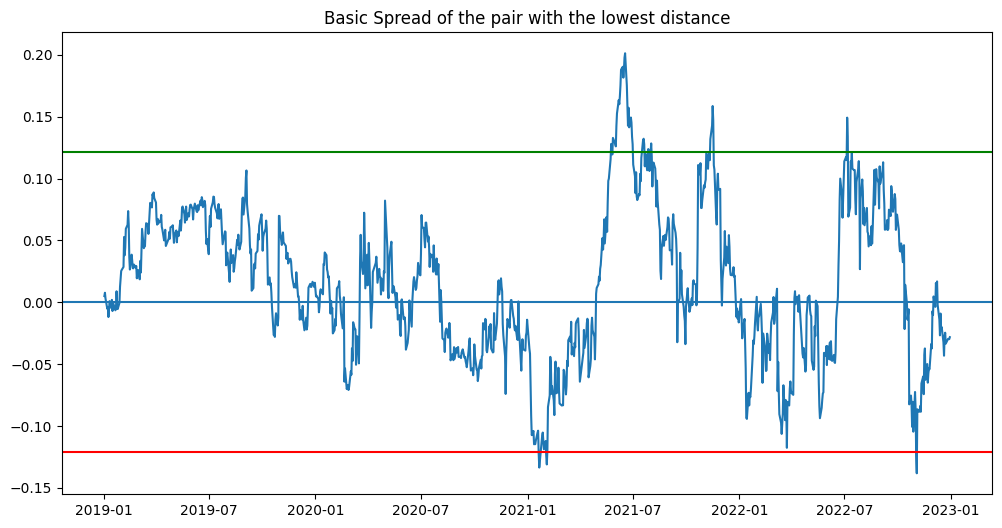

In [21]:
plt.figure(figsize=(12,6))
plt.plot(sorted_dist.iloc[0]['Basic Spread'])
plt.axhline(2*sorted_dist.iloc[0]['STD'], color='green')
plt.axhline(-2*sorted_dist.iloc[0]['STD'], color='red')
plt.axhline(0)
plt.title('Basic Spread of the pair with the lowest distance')
plt.show()

7. Beta Neutral Spread

In [22]:
Pairs.iloc[0]['Ticker2']

'SU.PA'

In [23]:
for i in range(len(Pairs)):
    Y = Pairs.iloc[i]['Series1_norm']
    X = Pairs.iloc[i]['Series2_norm']
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    Ticker2 = Pairs.iloc[i]['Ticker2']
    Pairs.loc[i, 'Beta'] = model.params[('Normalised', Ticker2)]


In [24]:
Pairs['Beta Neutral Spread'] = Pairs['Series1_norm']-Pairs['Beta']*Pairs['Series2_norm']

In [25]:
Pairs

,Ticker1,Ticker2,Series1,Series2,Series1_norm,Series2_norm,Euclidean Distance,Basic Spread,Beta,Beta Neutral Spread
0,OR.PA,SU.PA,Date 2019-01-02 180.898026 2019-01-03 17...,Date 2019-01-02 51.453636 2019-01-03 5...,Date 2019-01-02 0.017121 2019-01-03 0.00...,Date 2019-01-02 0.012097 2019-01-03 0.00...,2.005759,Date 2019-01-02 0.005024 2019-01-03 0.00...,0.968036,Date 2019-01-02 0.005411 2019-01-03 0.00...
1,ML.PA,SGO.PA,Date 2019-01-02 17.613869 2019-01-03 17....,Date 2019-01-02 24.626869 2019-01-03 24....,Date 2019-01-02 0.128958 2019-01-03 0.11...,Date 2019-01-02 0.191900 2019-01-03 0.18...,2.623517,Date 2019-01-02 -0.062941 2019-01-03 -0.07...,0.831760,Date 2019-01-02 -0.030656 2019-01-03 -0.04...
2,CAP.PA,RI.PA,Date 2019-01-02 76.586601 2019-01-03 7...,Date 2019-01-02 122.473122 2019-01-03 12...,Date 2019-01-02 0.153036 2019-01-03 0.12...,Date 2019-01-02 0.172612 2019-01-03 0.15...,2.761645,Date 2019-01-02 -0.019576 2019-01-03 -0.02...,1.044510,Date 2019-01-02 -0.027259 2019-01-03 -0.03...
3,OR.PA,MC.PA,Date 2019-01-02 180.898026 2019-01-03 17...,Date 2019-01-02 231.247971 2019-01-03 22...,Date 2019-01-02 0.017121 2019-01-03 0.00...,Date 2019-01-02 0.017739 2019-01-03 0.00...,2.790912,Date 2019-01-02 -0.000618 2019-01-03 0.00...,0.851072,Date 2019-01-02 0.002023 2019-01-03 0.00...
4,BNP.PA,RI.PA,Date 2019-01-02 25.237352 2019-01-03 25....,Date 2019-01-02 122.473122 2019-01-03 12...,Date 2019-01-02 0.216865 2019-01-03 0.21...,Date 2019-01-02 0.172612 2019-01-03 0.15...,2.996633,Date 2019-01-02 0.044253 2019-01-03 0.06...,0.895558,Date 2019-01-02 0.062281 2019-01-03 0.07...


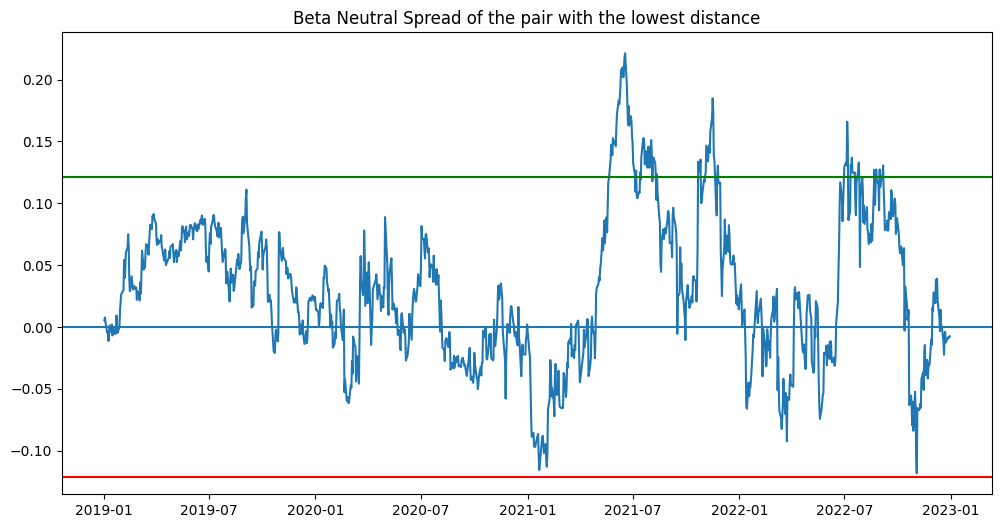

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(Pairs.iloc[0]['Beta Neutral Spread'])
plt.axhline(2*sorted_dist.iloc[0]['STD'], color='green')
plt.axhline(-2*sorted_dist.iloc[0]['STD'], color='red')
plt.axhline(0)
plt.title('Beta Neutral Spread of the pair with the lowest distance')
plt.show()

Dollar Neutral Spread

In [27]:
Pairs.loc[0,'Series1']

Date
2019-01-02    180.898026
2019-01-03    178.722900
2019-01-04    181.260559
2019-01-07    178.949478
2019-01-08    180.037048
                 ...    
2022-12-23    319.108032
2022-12-27    322.459473
2022-12-28    321.166779
2022-12-29    324.326752
2022-12-30    319.443176
Name: (Close, OR.PA), Length: 1028, dtype: float64

In [49]:
Pairs['Sum_Series1'] = Pairs['Series1'].apply(np.sum)
Pairs['Sum_Series2'] = Pairs['Series2'].apply(np.sum)
Pairs['Dollar_coef'] = Pairs['Sum_Series1']/Pairs['Sum_Series2']
Pairs['Dollar Neutral Spread'] = Pairs['Series1_norm'] - Pairs['Dollar_coef']*Pairs['Series2_norm']
Pairs = Pairs.drop(['Sum_Series1','Sum_Series2'], axis=1)
Pairs

,Ticker1,Ticker2,Series1,Series2,Series1_norm,Series2_norm,Euclidean Distance,Basic Spread,Beta,Beta Neutral Spread,Dollar_coef,Dollar Neutral Spread
0,OR.PA,SU.PA,Date 2019-01-02 180.898026 2019-01-03 17...,Date 2019-01-02 51.453636 2019-01-03 5...,Date 2019-01-02 0.017121 2019-01-03 0.00...,Date 2019-01-02 0.012097 2019-01-03 0.00...,2.005759,Date 2019-01-02 0.005024 2019-01-03 0.00...,0.968036,Date 2019-01-02 0.005411 2019-01-03 0.00...,2.748292,Date 2019-01-02 -0.016124 2019-01-03 0.00...
1,ML.PA,SGO.PA,Date 2019-01-02 17.613869 2019-01-03 17....,Date 2019-01-02 24.626869 2019-01-03 24....,Date 2019-01-02 0.128958 2019-01-03 0.11...,Date 2019-01-02 0.191900 2019-01-03 0.18...,2.623517,Date 2019-01-02 -0.062941 2019-01-03 -0.07...,0.831760,Date 2019-01-02 -0.030656 2019-01-03 -0.04...,0.630373,Date 2019-01-02 0.007990 2019-01-03 -0.00...
2,CAP.PA,RI.PA,Date 2019-01-02 76.586601 2019-01-03 7...,Date 2019-01-02 122.473122 2019-01-03 12...,Date 2019-01-02 0.153036 2019-01-03 0.12...,Date 2019-01-02 0.172612 2019-01-03 0.15...,2.761645,Date 2019-01-02 -0.019576 2019-01-03 -0.02...,1.044510,Date 2019-01-02 -0.027259 2019-01-03 -0.03...,0.868767,Date 2019-01-02 0.003076 2019-01-03 -0.00...
3,OR.PA,MC.PA,Date 2019-01-02 180.898026 2019-01-03 17...,Date 2019-01-02 231.247971 2019-01-03 22...,Date 2019-01-02 0.017121 2019-01-03 0.00...,Date 2019-01-02 0.017739 2019-01-03 0.00...,2.790912,Date 2019-01-02 -0.000618 2019-01-03 0.00...,0.851072,Date 2019-01-02 0.002023 2019-01-03 0.00...,0.600288,Date 2019-01-02 0.006472 2019-01-03 0.00...
4,BNP.PA,RI.PA,Date 2019-01-02 25.237352 2019-01-03 25....,Date 2019-01-02 122.473122 2019-01-03 12...,Date 2019-01-02 0.216865 2019-01-03 0.21...,Date 2019-01-02 0.172612 2019-01-03 0.15...,2.996633,Date 2019-01-02 0.044253 2019-01-03 0.06...,0.895558,Date 2019-01-02 0.062281 2019-01-03 0.07...,0.238094,Date 2019-01-02 0.175767 2019-01-03 0.17...


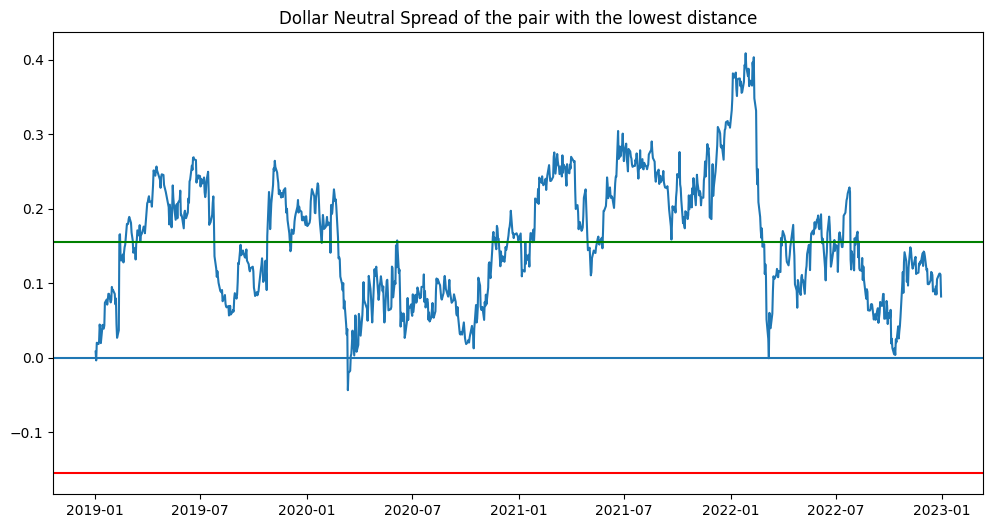

In [51]:
plt.figure(figsize=(12,6))
plt.plot(Pairs.iloc[1]['Dollar Neutral Spread'])
plt.axhline(2*sorted_dist.iloc[1]['STD'], color='green')
plt.axhline(-2*sorted_dist.iloc[1]['STD'], color='red')
plt.axhline(0)
plt.title('Dollar Neutral Spread of the pair with the lowest distance')
plt.show()